In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


In the following, we set all lambda to be 1

In [2]:
def function_val(x):
    return np.abs(la.norm(x)**2 - 1)

In [3]:
# Value of rho (might be larger)
rho = 4

In [4]:
def subgradient(x):
    gradient = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] > 1 or x[i] < -1:
            gradient[i] = 2 * x[i]
        if x[i]== -1 or x[i] == 1:
            gradient[i] = 0
        else:
            gradient[i] = - 2 * x[i]
    return gradient


In [5]:
def subgradient(x):
    gradient = np.zeros(x.shape[0])
    if la.norm(x)**2 > 1:
        gradient = 2 * x
    else:
        if la.norm(x)**2 == 1:
            gradient = 0
        else:
            gradient = -2*x
    return gradient

In [6]:
def m_k(x, x_history, k):
    mk_sum = 0
    Sk = k + 1
    for i in range(k + 1):
        mk_sum += function_val(x_history[i]) + subgradient(x_history[i]) @ (x -  x_history[i]) - rho/2 * la.norm(x-x_history[i])**2
    mk = mk_sum / Sk
    return mk

We will set rho_hat as a variable in the following attempts

In [8]:
x0_random = np.random.normal(0,1,3)

In [10]:
def dual_progress(x0, k, rho_hat):
    x_history = [x0]
    x = x0
    dual_gap_list = []
    x1 = x - 1/2 * subgradient(x=x)/ (rho_hat -rho) 
    for i in range(k):
        grad = subgradient(x=x)
        x = x - 1/((i+1) *(rho_hat -rho)) * grad
        mk = m_k(x = x, x_history= x_history, k = i)
        x_history.append(x)
        fun_val = function_val(x=x)
        gap = fun_val - mk  
        dual_gap_list.append(gap)
    return mk, fun_val, dual_gap_list
        

In [11]:
m_k_1, f_val_1, dual_gap = dual_progress(np.zeros(3), 100, 104) 


In [12]:
x0_random = np.random.normal(0,1,3)

-0.00016222285951655104 8.101012356487303e-07 [0.684223217055549, 0.09501599183444169, 0.12664385028776612, 0.045271525933795576, 0.08313232992466763, 0.024974883991556743, 0.06518256790176034, 0.013965712449659606, 0.055449447294353006, 0.008396706942808883, 0.04529684053512652, 0.008167898739050081, 0.03869179551971074, 0.006499038480303856, 0.03228530908439145, 0.0053435688997613634, 0.029973373524822912, 0.005531895709024999, 0.02482670518121381, 0.004241004951628664, 0.023162971123209742, 0.0040048268651544094, 0.02169448197119057, 0.0037769469230406025, 0.01913996861500792, 0.0030929866082663343, 0.018673262051726452, 0.0034574554136533923, 0.016236359514956368, 0.0028961386171616707, 0.015508310613077215, 0.002583133238056197, 0.015093470782189873, 0.002694866479555615, 0.013573105447446842, 0.002307999899641946, 0.013069765272973256, 0.0022476945642294216, 0.01263001949733261, 0.002169971084783743, 0.011687983949052707, 0.0019295757520111328, 0.011533053626796845, 0.00205872444

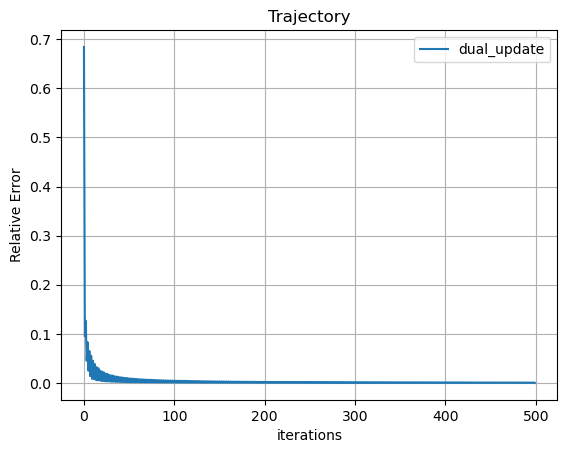

In [13]:
m_k_2, f_val_2, dual_gap2 = dual_progress(x0_random, 500, 14) 
print(m_k_2,f_val_2,dual_gap2 )
plt.plot(np.arange(len(dual_gap2)), dual_gap2, label = 'dual_update')
plt.grid(True)
plt.ylabel("Relative Error")
plt.xlabel("iterations")
plt.title('Trajectory')
plt.legend()

In [17]:
x0_far = np.random.normal(0,1,3) * 900

In [20]:
_,_, gap = dual_progress(x0_far, 1000000, 6) 
print(_)
plt.plot(np.arange(len(gap)), gap, label = 'dual_update')
plt.grid(True)
plt.ylabel("dual gap")
plt.xlabel("iterations")
plt.title('Trajectory')
plt.legend()

KeyboardInterrupt: 